In [1]:
from sklearn.pipeline import Pipeline # For setting up pipeline
# Various pre-processing steps
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/home/parnian/digipay/Training Data.csv')

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer , make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [4]:
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [5]:
cat_pipeline = make_pipeline(
      SimpleImputer(strategy="most_frequent"),
      OneHotEncoder(handle_unknown="ignore")
)

In [6]:
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [8]:
cat_attributes = ['Married/Single', 'House_Ownership' , 'Car_Ownership', 'Profession', 'CITY', 'STATE']
num_attributes = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

In [9]:
preprocessing = ColumnTransformer([
    ('cat', cat_pipeline, cat_attributes),
    ('num', num_pipeline, num_attributes)],
     remainder='drop',
    )

In [10]:
X = df.drop(columns=['Risk_Flag', 'Id'])
y = df.Risk_Flag

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### **Logestic Regression**

In [12]:
from sklearn.linear_model import LogisticRegression

log_reg = make_pipeline(preprocessing, LogisticRegression(random_state=0))
log_reg.fit(X_train, y_train)

/home/parnian/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Married/Single',
                                                   'House_Ownership',
                                                   'Car_Ownership',
                                                   'Profession', 'CITY',
                                                   'STATE']),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Income', 'Age',
                                                   'Experience',
                                                   'CURRENT_JOB_YRS',
                                                   'CURRENT_HOUSE_YRS'])])),
                ('logisticregression', LogisticRegression(random_state=0))])

In [13]:
predict_log = log_reg.predict(X_test)

In [14]:
predict_log

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

print('Precision: %.3f' % precision_score(y_test, predict_log))
print('Recall: %.3f' % recall_score(y_test, predict_log))
print('Accuracy: %.3f' % accuracy_score(y_test, predict_log))
print('F1 Score: %.3f' % f1_score(y_test, predict_log))


Precision: 0.000
Recall: 0.000
Accuracy: 0.875
F1 Score: 0.000


/home/parnian/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


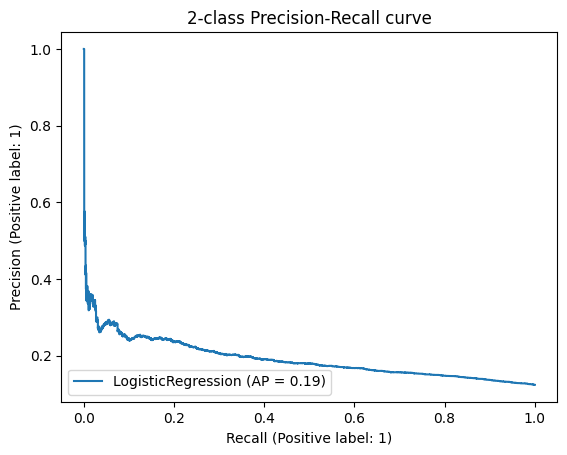

In [17]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    log_reg, X_test, y_test, name="LogisticRegression")
_ = display.ax_.set_title("2-class Precision-Recall curve")



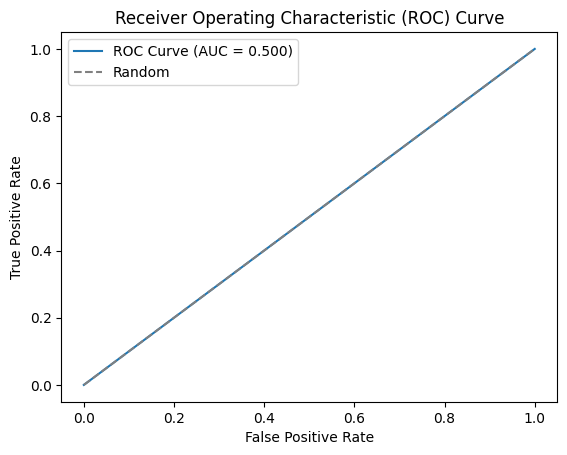

In [16]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have true labels and predicted probabilities
true_labels = y_test
predicted_probabilities = predict_log

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(true_labels, predicted_probabilities)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = %.3f)' % auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test,predict_log))
print(classification_report(y_test,predict_log))
acc1 = accuracy_score(y_test,predict_log)

[[55097     0]
 [ 7903     0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     55097
           1       0.00      0.00      0.00      7903

    accuracy                           0.87     63000
   macro avg       0.44      0.50      0.47     63000
weighted avg       0.76      0.87      0.82     63000



/home/parnian/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/parnian/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/parnian/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Support Vector Classifier**

In [25]:
from sklearn.svm import SVC

In [26]:
svc_clf = make_pipeline(preprocessing, SVC(gamma='auto'))
svc_clf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Married/Single',
                                                   'House_Ownership',
                                                   'Car_Ownership',
                                                   'Profession', 'CITY',
                                                   'STATE']),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Income', 'Age',
                                                   'Experience',
                                                   'CURRENT_JOB_YRS',
                                                   'CURRENT_HOUSE_YRS'])])),
                ('svc', SVC(gamma='auto'))])

In [27]:
predict_svc = svc_clf.predict(X_test)

In [28]:
print('Precision: %.3f' % precision_score(y_test, predict_svc))
print('Recall: %.3f' % recall_score(y_test, predict_svc))
print('Accuracy: %.3f' % accuracy_score(y_test, predict_svc))
print('F1 Score: %.3f' % f1_score(y_test, predict_svc))


Precision: 0.000
Recall: 0.000
Accuracy: 0.875
F1 Score: 0.000


/home/parnian/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:

display = PrecisionRecallDisplay.from_estimator(
    svc_clf, X_test, y_test, name="SVC")
_ = display.ax_.set_title("2-class Precision-Recall curve")



NameError: name 'PrecisionRecallDisplay' is not defined

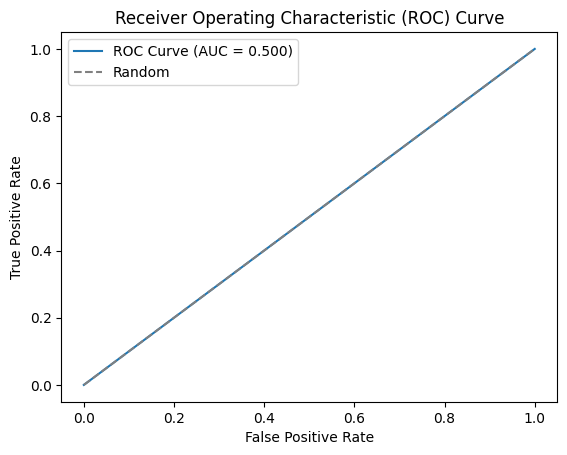

In [30]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have true labels and predicted probabilities
true_labels = y_test
predicted_probabilities_svc = predict_svc

# Calculate false positive rate, true positive rate, and thresholds
fpr_svc, tpr_svc, thresholds_svc = roc_curve(true_labels, predicted_probabilities_svc)

# Calculate the area under the ROC curve (AUC)
auc_svc = roc_auc_score(true_labels, predicted_probabilities_svc)

# Plot the ROC curve
plt.plot(fpr_svc, tpr_svc, label='ROC Curve (AUC = %.3f)' % auc_svc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [31]:
print(confusion_matrix(y_test,predict_svc))
print(classification_report(y_test,predict_svc))
acc_svc = accuracy_score(y_test,predict_svc)

[[55097     0]
 [ 7903     0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     55097
           1       0.00      0.00      0.00      7903

    accuracy                           0.87     63000
   macro avg       0.44      0.50      0.47     63000
weighted avg       0.76      0.87      0.82     63000



/home/parnian/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/parnian/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/parnian/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Random Forest Classifier**

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = make_pipeline(preprocessing, RandomForestClassifier(n_estimators = 250))
rf_clf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Married/Single',
                                                   'House_Ownership',
                                                   'Car_Ownership',
                                                   'Profession', 'CITY',
                                                   'STATE']),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Income', 'Age',
                                                   'Experience',
                                                   'CURRENT_JOB_YRS',
                                                   'CURRENT_HOUSE_YRS'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=250))])

In [19]:
predict_rf = rf_clf.predict(X_test)

In [33]:
print('Precision: %.3f' % precision_score(y_test, predict_rf))
print('Recall: %.3f' % recall_score(y_test, predict_rf))
print('Accuracy: %.3f' % accuracy_score(y_test, predict_rf))
print('F1 Score: %.3f' % f1_score(y_test, predict_rf))


Precision: 0.612
Recall: 0.516
Accuracy: 0.898
F1 Score: 0.560


In [34]:

display = PrecisionRecallDisplay.from_estimator(
    rf_clf, X_test, y_test, name="RandomForestClassifier")
_ = display.ax_.set_title("2-class Precision-Recall curve")



NameError: name 'PrecisionRecallDisplay' is not defined

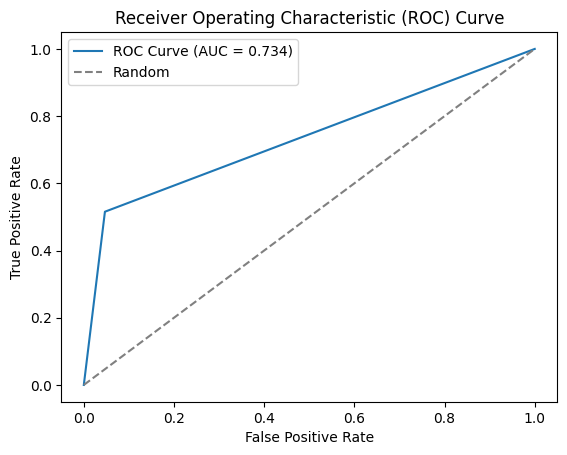

In [35]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have true labels and predicted probabilities
true_labels = y_test
predicted_probabilities_rf = predict_rf

# Calculate false positive rate, true positive rate, and thresholds
fpr_rf, tpr_rf, thresholds_rf = roc_curve(true_labels, predicted_probabilities_rf)

# Calculate the area under the ROC curve (AUC)
auc_rf = roc_auc_score(true_labels, predicted_probabilities_rf)

# Plot the ROC curve
plt.plot(fpr_rf, tpr_rf, label='ROC Curve (AUC = %.3f)' % auc_rf)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [36]:
print(confusion_matrix(y_test,predict_rf))
print(classification_report(y_test,predict_rf))
acc_rf = accuracy_score(y_test,predict_rf)

[[52518  2579]
 [ 3829  4074]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     55097
           1       0.61      0.52      0.56      7903

    accuracy                           0.90     63000
   macro avg       0.77      0.73      0.75     63000
weighted avg       0.89      0.90      0.89     63000



### **Decision Tree**

In [37]:
from sklearn import tree
tree_clf = make_pipeline(preprocessing, tree.DecisionTreeClassifier())
tree_clf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Married/Single',
                                                   'House_Ownership',
                                                   'Car_Ownership',
                                                   'Profession', 'CITY',
                                                   'STATE']),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Income', 'Age',
                                                   'Experience',
                                                   'CURRENT_JOB_YRS',
                                                   'CURRENT_HOUSE_YRS'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [41]:
predict_tree = tree_clf.predict(X_test)

In [42]:
print('Precision: %.3f' % precision_score(y_test, predict_tree))
print('Recall: %.3f' % recall_score(y_test, predict_tree))
print('Accuracy: %.3f' % accuracy_score(y_test, predict_tree))
print('F1 Score: %.3f' % f1_score(y_test, predict_tree))


Precision: 0.535
Recall: 0.540
Accuracy: 0.883
F1 Score: 0.537


In [43]:

display = PrecisionRecallDisplay.from_estimator(
    tree_clf, X_test, y_test, name="DecisionTreeClassifier")
_ = display.ax_.set_title("2-class Precision-Recall curve")



NameError: name 'PrecisionRecallDisplay' is not defined

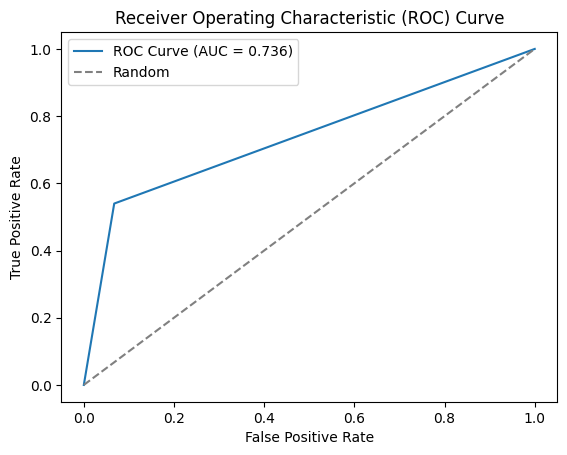

In [44]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have true labels and predicted probabilities
true_labels = y_test
predicted_probabilities_tree = predict_tree

# Calculate false positive rate, true positive rate, and thresholds
fpr_tree, tpr_tree, thresholds_tree = roc_curve(true_labels, predicted_probabilities_tree)

# Calculate the area under the ROC curve (AUC)
auc_tree = roc_auc_score(true_labels, predicted_probabilities_tree)

# Plot the ROC curve
plt.plot(fpr_tree, tpr_tree, label='ROC Curve (AUC = %.3f)' % auc_tree)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [45]:
print(confusion_matrix(y_test,predict_tree))
print(classification_report(y_test,predict_tree))
acc_tree = accuracy_score(y_test,predict_tree)

[[51382  3715]
 [ 3637  4266]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     55097
           1       0.53      0.54      0.54      7903

    accuracy                           0.88     63000
   macro avg       0.73      0.74      0.74     63000
weighted avg       0.88      0.88      0.88     63000



### **Naive bayes**

In [41]:
from sklearn.naive_bayes import BernoulliNB
nb_clf = make_pipeline(preprocessing, BernoulliNB())
nb_clf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Married/Single',
                                                   'House_Ownership',
                                                   'Car_Ownership',
                                                   'Profession', 'CITY',
                                                   'STATE']),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Income', 'Age',
                                                   'Experience',
                                                   'CURRENT_JOB_YRS',
                                                   'CURRENT_HOUSE_YRS'])])),
                ('bernoullinb', BernoulliNB())])

In [42]:
predict_nb = nb_clf.predict(X_test)

In [43]:
print('Precision: %.3f' % precision_score(y_test, predict_nb))
print('Recall: %.3f' % recall_score(y_test, predict_nb))
print('Accuracy: %.3f' % accuracy_score(y_test, predict_nb))
print('F1 Score: %.3f' % f1_score(y_test, predict_nb))


Precision: 0.478
Recall: 0.001
Accuracy: 0.878
F1 Score: 0.003


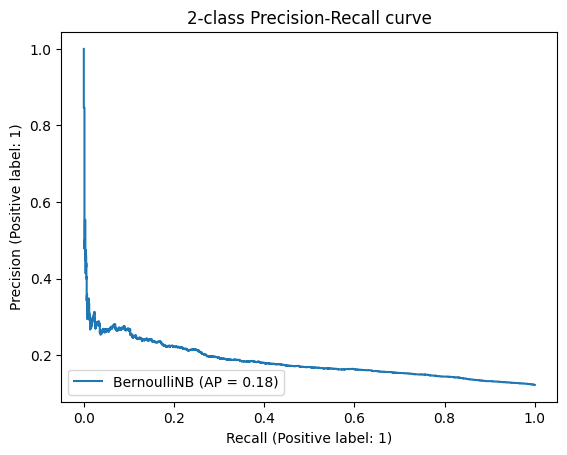

In [44]:
display = PrecisionRecallDisplay.from_estimator(
    nb_clf, X_test, y_test, name="BernoulliNB")
_ = display.ax_.set_title("2-class Precision-Recall curve")



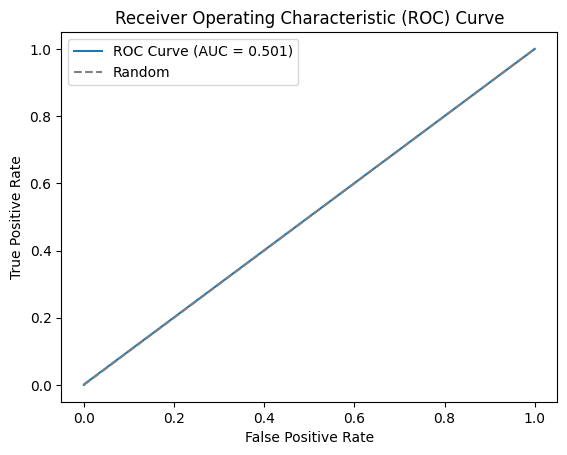

In [45]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have true labels and predicted probabilities
true_labels = y_test
predicted_probabilities_nb = predict_nb

# Calculate false positive rate, true positive rate, and thresholds
fpr_nb, tpr_nb, thresholds_nb = roc_curve(true_labels, predicted_probabilities_nb)

# Calculate the area under the ROC curve (AUC)
auc_nb = roc_auc_score(true_labels, predicted_probabilities_nb)

# Plot the ROC curve
plt.plot(fpr_nb, tpr_nb, label='ROC Curve (AUC = %.3f)' % auc_nb)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [57]:
print(confusion_matrix(y_test,predict_nb))
print(classification_report(y_test,predict_nb))
acc_nb = accuracy_score(y_test,predict_nb)

[[55292    12]
 [ 7685    11]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     55304
           1       0.48      0.00      0.00      7696

    accuracy                           0.88     63000
   macro avg       0.68      0.50      0.47     63000
weighted avg       0.83      0.88      0.82     63000



### **Stochastic Gradient Decent Classifier**

In [46]:
from sklearn.linear_model import SGDClassifier
sgd_clf = make_pipeline(preprocessing, SGDClassifier(penalty=None))
sgd_clf.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Married/Single',
                                                   'House_Ownership',
                                                   'Car_Ownership',
                                                   'Profession', 'CITY',
                                                   'STATE']),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Income', 'Age',
                                                   'Experience',
                                                   'CURRENT_JOB_YRS',
                                                   'CURRENT_HOUSE_YRS'])])),
                ('sgdclassifier', SGDClassifier(penalty=None))])

In [47]:
predict_sgd = sgd_clf.predict(X_test)

In [48]:
print('Precision: %.3f' % precision_score(y_test, predict_sgd))
print('Recall: %.3f' % recall_score(y_test, predict_sgd))
print('Accuracy: %.3f' % accuracy_score(y_test, predict_sgd))
print('F1 Score: %.3f' % f1_score(y_test, predict_sgd))


Precision: 0.000
Recall: 0.000
Accuracy: 0.878
F1 Score: 0.000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


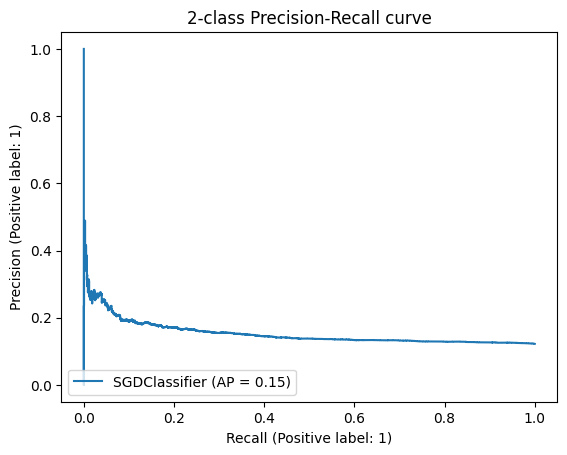

In [49]:
display = PrecisionRecallDisplay.from_estimator(
    sgd_clf, X_test, y_test, name="SGDClassifier")
_ = display.ax_.set_title("2-class Precision-Recall curve")



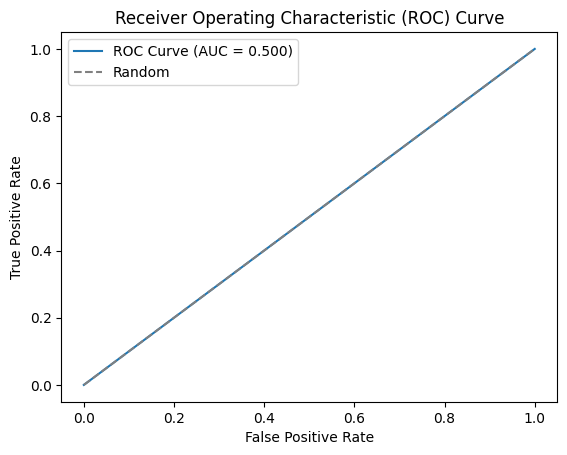

In [50]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have true labels and predicted probabilities
true_labels = y_test
predicted_probabilities_sgd = predict_sgd

# Calculate false positive rate, true positive rate, and thresholds
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(true_labels, predicted_probabilities_sgd)

# Calculate the area under the ROC curve (AUC)
auc_sgd = roc_auc_score(true_labels, predicted_probabilities_sgd)

# Plot the ROC curve
plt.plot(fpr_sgd, tpr_sgd, label='ROC Curve (AUC = %.3f)' % auc_sgd)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [58]:
print(confusion_matrix(y_test,predict_sgd))
print(classification_report(y_test,predict_sgd))
acc_sgd = accuracy_score(y_test,predict_sgd)

[[55304     0]
 [ 7696     0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     55304
           1       0.00      0.00      0.00      7696

    accuracy                           0.88     63000
   macro avg       0.44      0.50      0.47     63000
weighted avg       0.77      0.88      0.82     63000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **SVC and RandomForestClassifier preformed better**

### **Let's try to increase our accuracy of models**



### **Random Search and CV**

In [46]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [20]}

clf = RandomForestClassifier()
model_rs = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10,
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
tree_clf_rs = make_pipeline(preprocessing, model_rs)
tree_clf_rs.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/home/parnian/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
24 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/home/parnian/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/parnian/.local/lib/python3.10/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/parnian/.local/lib/python3.10/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/home/parnian/.l

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Married/Single',
                                                   'House_Ownership',
                                                   'Car_Ownership',
                                                   'Profession', 'CITY',
                                                   'STATE']),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strat...
                                                   'Experience',
                                                   'CURRENT_JOB_YRS',
                                                   'CURRENT_HOUSE_YRS'])])),
                ('randomizedsearchcv',
                 RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(),
                                    n_jobs=-1,
                                    param_distributions={'criterion': ['entropy',
                                                                       'gini'],
                                                         'max_depth': [2],
                                                         'max_features': ['auto',
                                                                          'sqrt'],
                                                         'min_samples_leaf': [4,
                                                                              6,
                                                                              8],
                                                         'min_samples_split': [5,
                                                                               7,
                                                                               10],
                                                         'n_estimators': [20]},
                                    random_state=101, verbose=1))])

In [47]:
predict_tree_clf_rs = tree_clf_rs.predict(X_test)

In [48]:
print(confusion_matrix(y_test,predict_tree_clf_rs))
print(classification_report(y_test,predict_tree_clf_rs))
acc_tree_clf_rs = accuracy_score(y_test,predict_tree_clf_rs)


[[55097     0]
 [ 7903     0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     55097
           1       0.00      0.00      0.00      7903

    accuracy                           0.87     63000
   macro avg       0.44      0.50      0.47     63000
weighted avg       0.76      0.87      0.82     63000



/home/parnian/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/parnian/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/parnian/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
model_rs.best_params_

{'n_estimators': 20,
 'min_samples_split': 10,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 2,
 'criterion': 'gini'}

### **Grid Search and CV**

In [52]:
from sklearn.model_selection import GridSearchCV

grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [20]}






clf = RandomForestClassifier()
model_gs = GridSearchCV(estimator = clf, param_grid = grid_search,
                               cv = 4, verbose= 5, n_jobs = -1)
tree_clf_gs = make_pipeline(preprocessing, model_gs)
tree_clf_gs.fit(X_train, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


/home/parnian/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/home/parnian/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/parnian/.local/lib/python3.10/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/parnian/.local/lib/python3.10/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/home/parnian/

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Married/Single',
                                                   'House_Ownership',
                                                   'Car_Ownership',
                                                   'Profession', 'CITY',
                                                   'STATE']),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strat...
                                                                   StandardScaler())]),
                                                  ['Income', 'Age',
                                                   'Experience',
                                                   'CURRENT_JOB_YRS',
                                                   'CURRENT_HOUSE_YRS'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=4, estimator=RandomForestClassifier(),
                              n_jobs=-1,
                              param_grid={'criterion': ['entropy', 'gini'],
                                          'max_depth': [2],
                                          'max_features': ['auto', 'sqrt'],
                                          'min_samples_leaf': [4, 6, 8],
                                          'min_samples_split': [5, 7, 10],
                                          'n_estimators': [20]},
                              verbose=5))])

In [55]:
predict_tree_clf_gs = tree_clf_gs.predict(X_test)

In [56]:

#Getting our accuracy score for the model
accuracy_rf_gs=tree_clf_gs.best_score_
accuracy_rf_gs

AttributeError: 'Pipeline' object has no attribute 'best_score_'

In [57]:
model_gs.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 20}

### **SVC**

In [59]:

x_svc = [1.0,10.0,100.0,500.0,1000.0]
y_svc = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
z_svc = [2,3,4]
parameters_svc=[{'C': x_svc,'kernel': ['linear']},
            {'C': x_svc,'kernel': ['rbf'],'gamma': y_svc} ,
            {'C': x_svc,'kernel': ['poly'],'gamma': y_svc,'degree': z_svc}
           ]
gridsearch_svc=GridSearchCV(estimator = SVC(random_state=0),
                        param_grid = parameters_svc,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1)


In [ ]:
svc_clf_gs = make_pipeline(preprocessing, gridsearch_svc)
svc_clf_gs.fit(X_train, y_train)

In [ ]:
predict_svc_gs = svc_clf_gs.predict(X_test)

In [ ]:
#Getting our accuracy score for the model
accuracy_svc_gs=svc_clf_gs.best_score_
accuracy_svc_gs

In [ ]:
model_gs.best_params_